Metodo de Ordenação Bubble Sort:

- Percorrer o vetor várias vezes
- A cada iteração, comparar cada elemento com seu sucessor e trocá-los de  lugar caso estejam na ordem incorreta.

Metodo de Ordenação Quick Sort:

- Dividir o vetor em dois vetores menores que serão
ordenados independentemente e combinados para
produzir o resultado final.

In [92]:
import random
import time
import matplotlib.pyplot as plt #deve baixar esta "pip install matplotlib" no terminal

Obs: demorou cerca de 11 minutos para rodar tudo no meu computador!

Funçoes:

In [93]:
def bubbleSort(vetor):
    i = 0
    troca = 1

    while i < len(vetor)-1 and troca:
        troca = 0
        j = 0  

        while j < len(vetor)-i-1:
            if vetor[j] > vetor[j+1]:
                troca = 1
                aux = vetor[j]
                vetor[j] = vetor[j+1]
                vetor[j+1] = aux

            j = j+1

        i = i+1

    return vetor

def particao(vetor, inicio, fim):
    pivot = vetor[inicio]
    indice_superior = fim
    indice_inferior = inicio

    while indice_inferior < indice_superior:
        while indice_inferior <= fim and vetor[indice_inferior] <= pivot:
            indice_inferior += 1
        while vetor[indice_superior] > pivot:
            indice_superior -= 1
        if indice_inferior < indice_superior:
            auxiliar = vetor[indice_inferior]
            vetor[indice_inferior] = vetor[indice_superior]
            vetor[indice_superior] = auxiliar

    vetor[inicio] = vetor[indice_superior]
    vetor[indice_superior] = pivot

    return indice_superior

def quickSort(vetor):
    pilha = [(0, len(vetor) - 1)]
    while pilha:
        inicio, fim = pilha.pop()
        if inicio < fim:
            indice_pivot = particao(vetor, inicio, fim)
            pilha.append((inicio, indice_pivot - 1))
            pilha.append((indice_pivot + 1, fim))
            
    return vetor


def tempoExecucaoBubbleSort(vetor):
    tempoInicial = time.time()
    bubbleSort(vetor)
    tempoFinal = time.time()
    tempoExecucao = tempoFinal - tempoInicial
    return tempoExecucao

def tempoExecucaoQuickSort(vetor):
    tempoInicial = time.time()
    quickSort(vetor)
    tempoFinal = time.time()
    tempoExecucao = tempoFinal - tempoInicial
    return tempoExecucao


def gerarGraficoComparacaoMetodos(x, y1, y2, titulo):
    plt.plot(x, y1, marker='o', color='Orange', label='Bubble Sort')
    plt.plot(x, y2, marker='o', color='Red', label='Quick Sort')
    plt.xlabel('Tamanho')
    plt.ylabel('Tempo(segundos)')
    plt.title(titulo)
    plt.legend()
    plt.show()

Parte do Bubble Sort:

In [94]:
tamanhos = [50, 500, 5000, 20000, 35000, 50000]
# tamanhos = [50, 100, 500, 1000]

temposCrescenteBubble = []
temposDecrescenteBubble = []
temposAleatorioBubble = []

for tamanho in tamanhos:
    vetorCrescente = list(range(tamanho)) #Cria vetor de ordem crescente nos tamanhos do vetor tamanhos
    vetorDecrescente = list(range(tamanho, 0, -1)) #Cria vetor de ordem decrescente nos tamanhos do vetor tamanhos
    vetorAleatorio = random.sample(range(tamanho), tamanho) #Cria vetor de ordem aleatória nos tamanhos do vetor tamanhos
    tempo = tempoExecucaoBubbleSort(vetorCrescente)
    temposCrescenteBubble.append(tempo)
    tempo = tempoExecucaoBubbleSort(vetorDecrescente)
    temposDecrescenteBubble.append(tempo)
    tempo = tempoExecucaoBubbleSort(vetorAleatorio)
    temposAleatorioBubble.append(tempo)


Parte do Quick Sort:

In [95]:
temposCrescenteQuick = []
temposDecrescenteQuick = []
temposAleatorioQuick = []

for tamanho in tamanhos:
    vetorCrescente = list(range(tamanho)) #Cria vetor de ordem crescente nos tamanhos do vetor tamanhos
    vetorDecrescente = list(range(tamanho, 0, -1)) #Cria vetor de ordem decrescente nos tamanhos do vetor tamanhos
    vetorAleatorio = random.sample(range(tamanho), tamanho) #Cria vetor de ordem aleatória nos tamanhos do vetor tamanhos
    tempo = tempoExecucaoQuickSort(vetorCrescente)
    temposCrescenteQuick.append(tempo)
    tempo = tempoExecucaoQuickSort(vetorDecrescente)
    temposDecrescenteQuick.append(tempo)
    tempo = tempoExecucaoQuickSort(vetorAleatorio)
    temposAleatorioQuick.append(tempo)

Comparação entre Bubble Sort e Quick Sort:

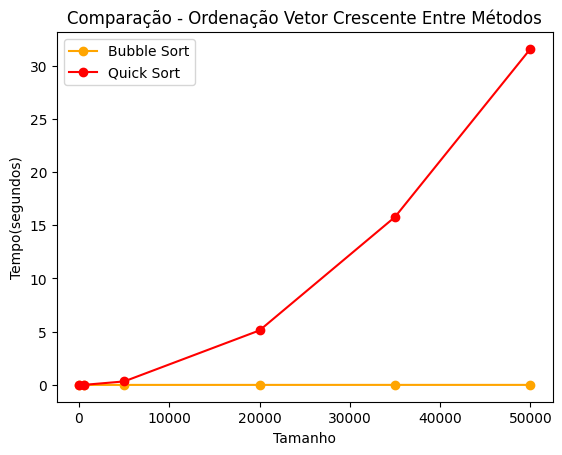

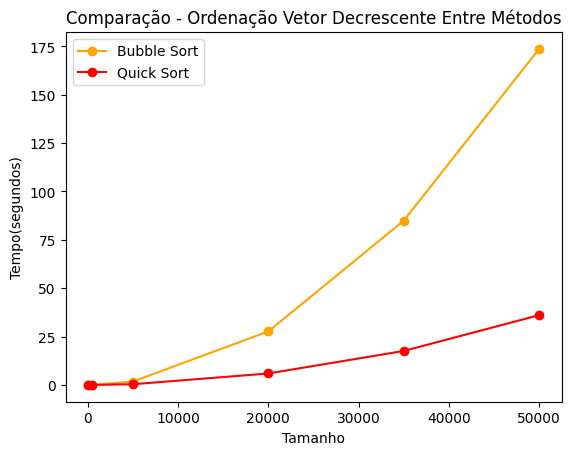

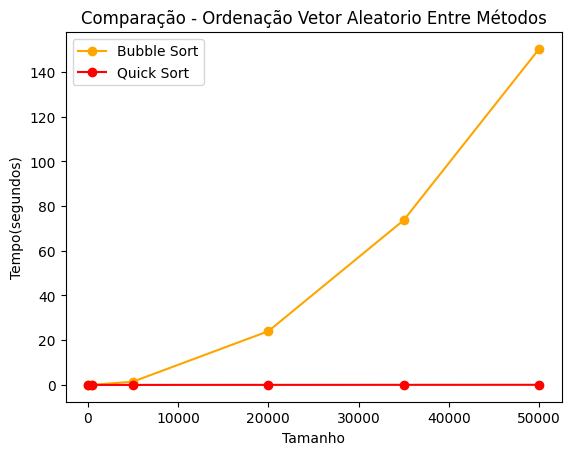

In [96]:
gerarGraficoComparacaoMetodos(tamanhos, temposCrescenteBubble, temposCrescenteQuick, "Comparação - Ordenação Vetor Crescente Entre Métodos")
gerarGraficoComparacaoMetodos(tamanhos, temposDecrescenteBubble, temposDecrescenteQuick, "Comparação - Ordenação Vetor Decrescente Entre Métodos")
gerarGraficoComparacaoMetodos(tamanhos, temposAleatorioBubble, temposAleatorioQuick, "Comparação - Ordenação Vetor Aleatorio Entre Métodos")